<a href="https://colab.research.google.com/github/WoradeeKongthong/stock_price_time_series/blob/master/02_stockPrice_multivariateMLP(KerasSequenceAPI)_singleStepOutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLP : time series forcasting with multiple features input and 1 step output (Keras Sequential API)**


In [0]:
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader 
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# Dataset : google stock price (2015-2019) from yahoo.com

In [20]:
df = DataReader('GOOG', data_source='yahoo', start='2015-01-01', end='2019-12-31')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,529.815369,522.665039,527.561584,523.373108,1447500.0,523.373108
2015-01-05,522.894409,511.655243,521.827332,512.463013,2059800.0,512.463013
2015-01-06,514.761719,499.678131,513.589966,500.585632,2899900.0,500.585632
2015-01-07,505.855164,498.281952,505.611847,499.727997,2065000.0,499.727997
2015-01-08,502.101471,489.655640,496.626526,501.303680,3353500.0,501.303680


In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,529.815369,522.665039,527.561584,523.373108,1447500.0,523.373108
2015-01-05,522.894409,511.655243,521.827332,512.463013,2059800.0,512.463013
2015-01-06,514.761719,499.678131,513.589966,500.585632,2899900.0,500.585632
2015-01-07,505.855164,498.281952,505.611847,499.727997,2065000.0,499.727997
2015-01-08,502.101471,489.655640,496.626526,501.303680,3353500.0,501.303680
...,...,...,...,...,...,...
2019-12-24,1350.260010,1342.780029,1348.500000,1343.560059,347500.0,1343.560059
2019-12-26,1361.327026,1344.469971,1346.170044,1360.400024,667500.0,1360.400024
2019-12-27,1364.530029,1349.310059,1362.989990,1351.890015,1038400.0,1351.890015


#  Get X from Dataframe
Time series to train the model is the 'Open' and 'Close' price.  
The target is the next day 'Close' price.

In [0]:
X1 = df.loc[:, ['Open']].values
X2 = df.loc[:, ['Close']].values

In [7]:
print('X1 shape : ',X1.shape)
print('X2 shape : ',X2.shape)

X1 shape :  (1258, 1)
X2 shape :  (1258, 1)


# Data Preprocessing

In [0]:
# Feature Scaling on the data
from sklearn.preprocessing import MinMaxScaler
sc1 = MinMaxScaler(feature_range = (0,1))
sc2 = MinMaxScaler(feature_range = (0,1))

X1 = sc1.fit_transform(X1)
X2 = sc2.fit_transform(X2)
data_scaled = np.concatenate((X1, X2), axis=1)

In [9]:
# check the shape of preprocessed data
print('data shape : ', data_scaled.shape)
data_scaled[:5]

data shape :  (1258, 2)


array([[0.03938367, 0.03698029],
       [0.03279298, 0.0244395 ],
       [0.02332534, 0.01078684],
       [0.01415566, 0.00980102],
       [0.00382835, 0.01161222]])

# Create timestep sequence
X : n_steps sequence of data  
y : 1 step output

In [0]:
def create_sequence(data, n_steps):
  X = []
  y = []
  for i in range(n_steps, len(data)):
    X.append(data[i - n_steps:i])
    y.append(data[i,-1])
  return np.array(X), np.array(y)

In [28]:
# choose number of timesteps
n_steps = 60
# Create the sequence and the output
X,y = create_sequence(data_scaled, n_steps)
print('X shape : ',X.shape)
print('y shape : ',y.shape)

# MLP model need vector shape of input 
# X dimension will be [samples, timesteps * features]
n_input = X.shape[1]*X.shape[2]
X = X.reshape(X.shape[0], n_input)
y = y.reshape(y.shape[0],)  
print('After reshape')
print('X shape : ',X.shape)
print('y shape : ',y.shape)

X shape :  (1198, 60, 2)
y shape :  (1198,)
After reshape
X shape :  (1198, 120)
y shape :  (1198,)


In [12]:
print(X[0],'==>',y[0])

[0.03938367 0.03698029 0.03279298 0.0244395  0.02332534 0.01078684
 0.01415566 0.00980102 0.00382835 0.01161222 0.01158817 0.00414966
 0.00033241 0.         0.00480261 0.00416113 0.         0.00953737
 0.01251658 0.01059198 0.00614368 0.01780232 0.01874048 0.01644967
 0.01444219 0.02921971 0.03075271 0.04796196 0.04692567 0.05433553
 0.05029558 0.04890201 0.04048399 0.02989603 0.03224279 0.02000327
 0.01874048 0.02075982 0.02431103 0.04811105 0.04250132 0.04118724
 0.03822597 0.04205846 0.03964729 0.03463028 0.03340049 0.04015557
 0.03781334 0.04407599 0.03822597 0.04044216 0.03971604 0.05088509
 0.04659329 0.04977316 0.04882837 0.05775158 0.05582025 0.06472121
 0.05980904 0.05764838 0.05358517 0.05404893 0.04973388 0.05768276
 0.05556813 0.05318922 0.04745292 0.0451191  0.04051843 0.04991074
 0.04728105 0.05882914 0.05565982 0.07213788 0.06830242 0.07548511
 0.07551212 0.09031852 0.08688247 0.09295505 0.08851011 0.09264552
 0.09212064 0.09489232 0.09196014 0.08612869 0.08276755 0.0874

# MLP model

In [13]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# define MLP model
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=n_input))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train MLP

In [0]:
history = model.fit(X, y, epochs = 1000, verbose = 0)

training loss :  0.06922932469654511


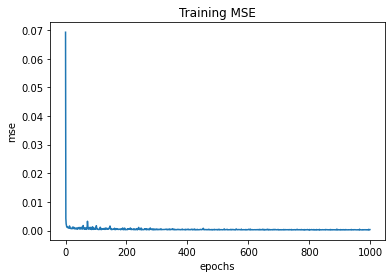

In [16]:
score = history.history['loss'][0]
print('training loss : ', score)

plt.plot(history.history['loss'])
plt.title('Training MSE')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show()

Model Evaluation : 
MSE :  88.52112850712649
RMSE :  9.408566761580984


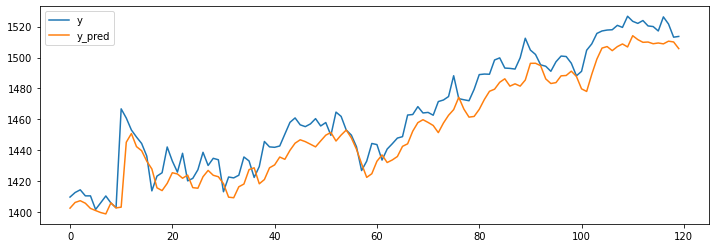

In [29]:
y_pred = model.predict(X)

# inverse transform the price
y = sc2.inverse_transform(y.reshape(len(y),1))
y_pred = sc2.inverse_transform(y_pred)

# calculate rmse
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)
print('Model Evaluation : ')
print('MSE : ', mse) 
print('RMSE : ', rmse)

# plot
plt.figure(figsize=(12,4))
plt.plot(y[-120:])
plt.plot(y_pred[-120:])
plt.legend(['y','y_pred'])
plt.show()

# Model Evaluation : walk forward validation

In [41]:
# get the test set : Jan - March of 2020
df = DataReader('GOOG', data_source='yahoo', start='2020-01-01', end='2020-03-31')
X1 = df.loc[:, ['Open']].values
X2 = df.loc[:, ['Close']].values

# feature scaling on the test set
sc1 = MinMaxScaler(feature_range = (0,1))
sc2 = MinMaxScaler(feature_range = (0,1))

X1 = sc1.fit_transform(X1)
X2 = sc2.fit_transform(X2)
test = np.concatenate((X1, X2), axis=1)

# seed the last n_steps in training dataset
history = data_scaled[-n_steps:]

# create timestep sequence for the training set
test = np.concatenate((history, test), axis=0)
X_test, y_test = create_sequence(test, n_steps)

# MLP model need vector shape of input 
# X dimension will be [samples, timesteps * features]
n_input = X_test.shape[1]*X_test.shape[2]
X_test = X_test.reshape(X_test.shape[0], n_input)
y_test = y_test.reshape(y_test.shape[0],1)  
print('After reshape')
print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)

After reshape
X_test shape :  (62, 120)
y_test shape :  (62, 1)


In [0]:
# Make predictions
y_pred = model.predict(X_test)

In [0]:
# inverse transform y_test and y_pred 
y_test = sc2.inverse_transform(y_test)
y_pred = sc2.inverse_transform(y_pred)

Model Evaluation : 
MSE :  4257.842491581315
RMSE :  65.2521454940856


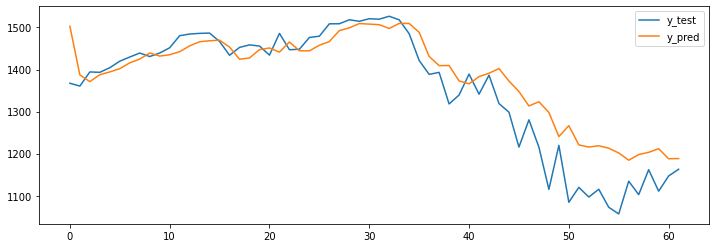

In [44]:
# calculate rmse
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print('Model Evaluation : ')
print('MSE : ', mse) 
print('RMSE : ', rmse)

# plot
plt.figure(figsize=(12,4))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test','y_pred'])
plt.show()